Step 1: Load and Inspect the Data

In [2]:
import pandas as pd

# Load the dataset (make sure the path is correct)
df = pd.read_csv('./TARP.csv')

# Show the first few rows of the dataset
print(df.head())

   Soil Moisture  Temperature   Soil Humidity  Time  Air temperature (C)  \
0             54           22              70    21                19.52   
1             12           20              40   104                19.49   
2             34           26              35    62                19.47   
3              7           44              44    93                19.54   
4             50           38              23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K Status  
0  6.502985  202.935536  90.0  42.0

In [3]:
# Print the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (100000, 15)


In [4]:
# Print the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
Soil Moisture            int64
Temperature              int64
 Soil Humidity           int64
Time                     int64
Air temperature (C)    float64
Wind speed (Km/h)      float64
Air humidity (%)       float64
Wind gust (Km/h)       float64
Pressure (KPa)         float64
ph                     float64
rainfall               float64
N                      float64
P                      float64
K                      float64
Status                  object
dtype: object


In [5]:
# Generate summary statistics for numeric columns
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       Soil Moisture    Temperature   Soil Humidity           Time  \
count  100000.000000  100000.000000   100000.000000  100000.000000   
mean       45.484070      22.536100       45.016790      55.253650   
std        25.993998      13.251352       14.726676      32.093033   
min         1.000000       0.000000       20.000000       0.000000   
25%        23.000000      11.000000       32.000000      28.000000   
50%        45.000000      23.000000       45.000000      55.000000   
75%        68.000000      34.000000       58.000000      83.000000   
max        90.000000      45.000000       70.000000     110.000000   

       Air temperature (C)  Wind speed (Km/h)  Air humidity (%)  \
count         23995.000000       23995.000000      23995.000000   
mean             24.263780           9.896898         58.521052   
std               6.756751           4.325666         30.073448   
min              11.220000           0.000000          0.590000   
25%      

In [6]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Soil Moisture              0
Temperature                0
 Soil Humidity             0
Time                       0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
rainfall               97800
N                      97800
P                      97800
K                      97800
Status                     0
dtype: int64


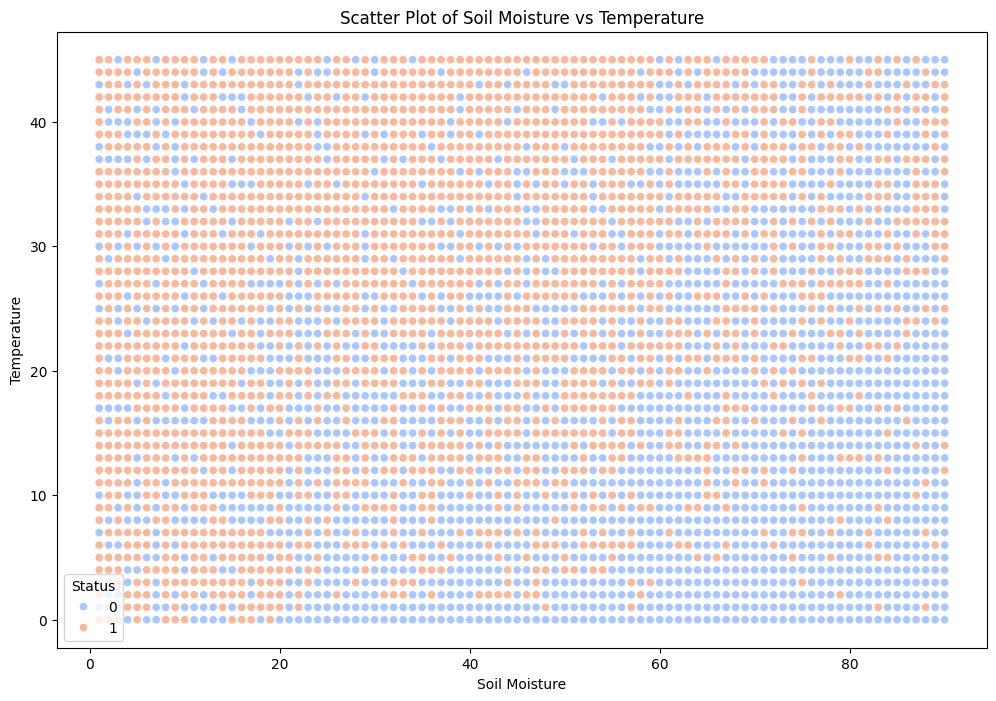

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the correct column names
plt.figure(figsize=(12, 8))

# Scatter plot for 'Soil Moisture' vs 'Temperature'
sns.scatterplot(x=df['Soil Moisture'], y=df['Temperature'], hue=df['Status'], palette='coolwarm')

# Adding labels and title
plt.title('Scatter Plot of Soil Moisture vs Temperature')
plt.xlabel('Soil Moisture')
plt.ylabel('Temperature')

# Show the plot
plt.show()

Step 2: Data Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Fill missing values with the column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert the target variable 'Status' to numeric (e.g., ON → 1, OFF → 0)
df['Status'] = df['Status'].map({'OFF': 0, 'ON': 1})

# Separate features and target
X = df.drop('Status', axis=1)
y = df['Status']

# Normalize numerical features using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Step 3: Model Selection and Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize the models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train each model on the training data
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("All models have been trained successfully.")

All models have been trained successfully.


Step 4: Model Evaluation


Logistic Regression Evaluation:
Accuracy: 0.7173
F1-Score: 0.7399
Confusion Matrix:
[[6303 3002]
 [2652 8043]]


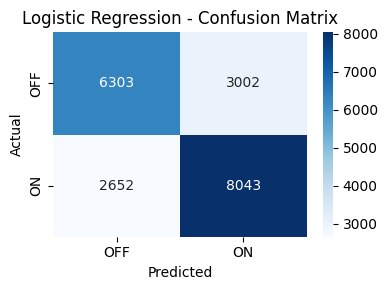


Decision Tree Evaluation:
Accuracy: 0.9997
F1-Score: 0.9997
Confusion Matrix:
[[ 9300     5]
 [    1 10694]]


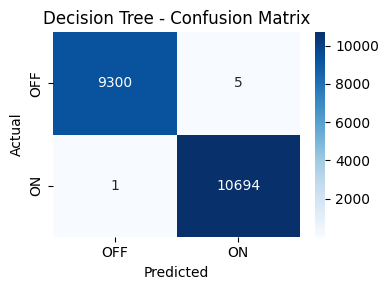


Random Forest Evaluation:
Accuracy: 0.9954
F1-Score: 0.9957
Confusion Matrix:
[[ 9232    73]
 [   19 10676]]


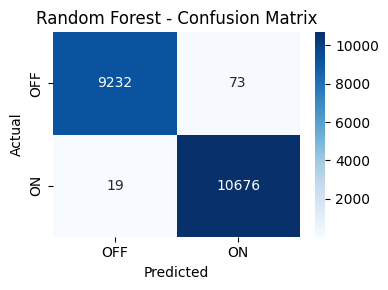

In [10]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to evaluate a model
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluate all models
evaluate_model("Logistic Regression", logistic_model, X_test, y_test)
evaluate_model("Decision Tree", decision_tree_model, X_test, y_test)
evaluate_model("Random Forest", random_forest_model, X_test, y_test)

Step 5: Model Optimization with GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize base model
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best F1-score during tuning: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
Best F1-score during tuning: 0.9998


Evaluate Optimized Model


Optimized Decision Tree Evaluation:
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[ 9305     0]
 [    0 10695]]


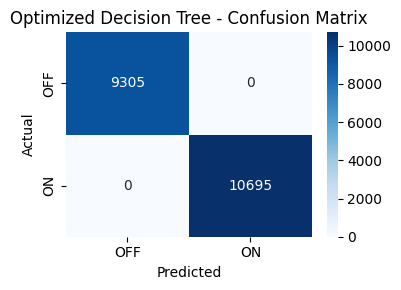

In [12]:
# Get best model from grid search
best_tree = grid_search.best_estimator_

# Evaluate the optimized model
evaluate_model("Optimized Decision Tree", best_tree, X_test, y_test)

Step 6: Save the Model

In [13]:
import joblib

# Save the optimized model to a file
joblib.dump(best_tree, 'optimized_decision_tree_model.pkl')

print("Model saved successfully!")

Model saved successfully!


Load the Saved Model

In [14]:
# Load the saved model from file
loaded_model = joblib.load('optimized_decision_tree_model.pkl')

# Now you can use the loaded model to make predictions or evaluate it
y_pred_loaded = loaded_model.predict(X_test)
print(f"Predictions from loaded model: {y_pred_loaded[:5]}")


Predictions from loaded model: [1 1 1 1 0]
